In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import spacy
import re
import nltk
from spacy.tokenizer import Tokenizer

In [2]:
import pickle
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [3]:
dt = pd.read_csv('train.csv')

In [4]:
dt

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
...,...,...,...,...,...,...
12115,2b78e2a914,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,en,English,2
12116,7e9943d152,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,en,English,0
12117,5085923e6c,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",en,English,2
12118,fc8e2fd1fe,At the west end is a detailed model of the who...,The model temple complex is at the east end.,en,English,2


In [5]:
dt.shape

(12120, 6)

In [5]:
dt.dropna()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
...,...,...,...,...,...,...
12115,2b78e2a914,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,en,English,2
12116,7e9943d152,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,en,English,0
12117,5085923e6c,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",en,English,2
12118,fc8e2fd1fe,At the west end is a detailed model of the who...,The model temple complex is at the east end.,en,English,2


### Language and label distribution

In [7]:
dt['language'].value_counts()

English       6870
Chinese        411
Arabic         401
French         390
Swahili        385
Urdu           381
Vietnamese     379
Russian        376
Hindi          374
Greek          372
Thai           371
Spanish        366
Turkish        351
German         351
Bulgarian      342
Name: language, dtype: int64

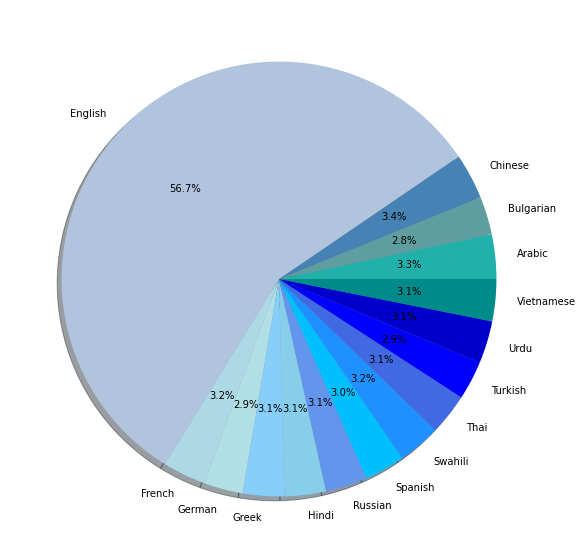

In [34]:
labels, frequencies = np.unique(dt.language.values, return_counts = True)
colors = ['#20B2AA','#5F9EA0','#4682B4','#B0C4DE','#ADD8E6','#B0E0E6','#87CEFA','#87CEEB','#6495ED','#00BFFF','#1E90FF','#4169E1','#0000FF','#0000CD','#008B8B']

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels,colors = colors, autopct = '%1.1f%%',shadow = True)
plt.show()

([<matplotlib.patches.Wedge at 0x2165f7a5040>,
 [Text(0.5160830215420813, 0.9714207712809089, '0'),
  Text(-1.0995364860037624, -0.031929859794527476, '1'),
  Text(0.5440631282009776, -0.9560310206955457, '2')],
 [Text(0.2814998299320443, 0.5298658752441321, '34.5%'),
  Text(-0.5997471741838704, -0.01741628716065135, '32.0%'),
  Text(0.2967617062914423, -0.5214714658339339, '33.5%')])

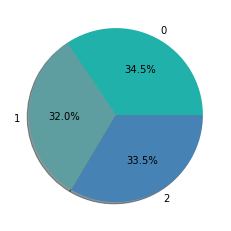

In [50]:
vals,freq = np.unique(dt.label.values, return_counts = True)
colors = ['#20B2AA','#5F9EA0','#4682B4','#B0C4DE','#ADD8E6','#B0E0E6','#87CEFA','#87CEEB','#6495ED','#00BFFF','#1E90FF','#4169E1','#0000FF','#0000CD','#008B8B']

plt.pie(freq,labels = vals,colors = colors,autopct = '%1.1f%%',shadow = True)

In [9]:
dt['label'].value_counts()

0    4176
2    4064
1    3880
Name: label, dtype: int64

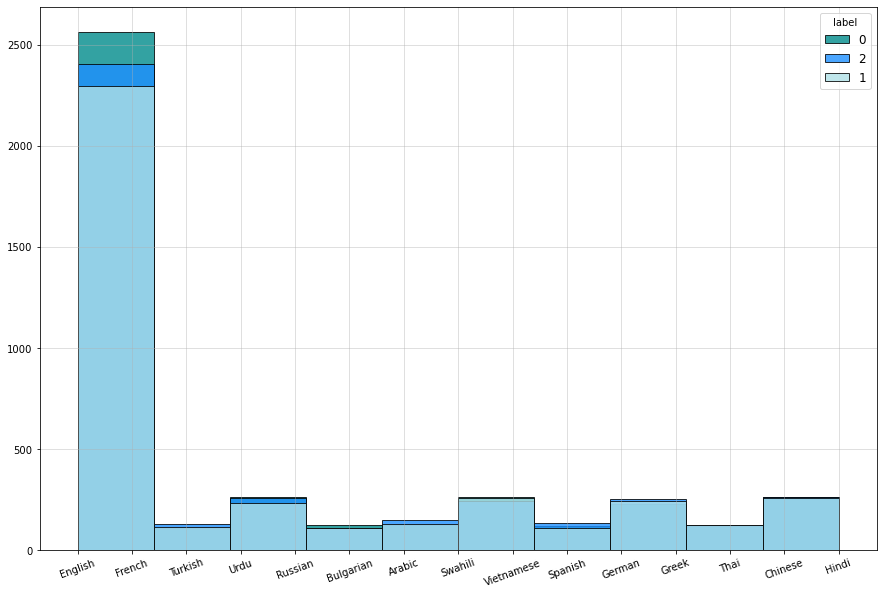

In [54]:
vals = list(dt['label'].unique())

fig = plt.figure(figsize=(15, 10))
colors = ['#008B8B','#1E90FF','#B0E0E6']
for i, val in enumerate(vals):
    plt.hist( dt[ dt['label']==val ]['language'], color= colors[i],
             edgecolor='black', label=val, alpha=0.8)
    
plt.legend(loc='best',title = 'label',fontsize=12)
plt.xticks(fontsize=10,rotation=20)
plt.yticks(fontsize=10)
plt.grid(alpha=0.5)
plt.show()
#plt.savefig('label_language.png')

## Dataset splitting

In [10]:
x = dt.premise.values +' '+ dt.hypothesis.values
y = dt.label.values
# split train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

## Classification with Naive Bayes Classifier

### default tokenization

In [9]:
NBC_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 5)), #tokenization
    ('sel', SelectKBest(chi2, k= 10)),  # feature selection
    ('learner', MultinomialNB())  # learning algorithm
])

NBC_pipeline.fit(X_train,y_train)
predictions = NBC_pipeline.predict(X_test)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

           0       0.36      0.93      0.52      1245
           1       0.35      0.02      0.03      1161
           2       0.57      0.15      0.24      1230

    accuracy                           0.38      3636
   macro avg       0.43      0.37      0.26      3636
weighted avg       0.43      0.38      0.27      3636

Confusion matrix:
[[1162   14   69]
 [1072   18   71]
 [1022   20  188]]


## SVM

### default tokenizer

Classification report:
              precision    recall  f1-score   support

           0       0.36      0.85      0.51      1245
           1       0.30      0.02      0.04      1161
           2       0.51      0.26      0.34      1230

    accuracy                           0.39      3636
   macro avg       0.39      0.38      0.30      3636
weighted avg       0.39      0.39      0.30      3636

Confusion matrix:
[[1059   30  156]
 [ 983   27  151]
 [ 883   32  315]]


C:\Users\eleon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


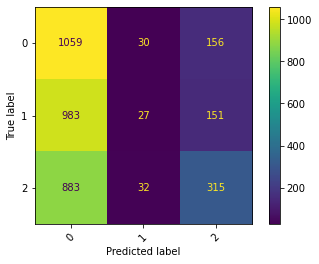

In [11]:
svm_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 5)), #tokenization
    ('sel', SelectKBest(chi2, k=15)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(X_train,y_train)
predictions = svm_pipeline.predict(X_test)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

plot_confusion_matrix(svm_pipeline, X_test, y_test)  
plt.xticks(rotation=45)
plt.show()

In [13]:
param_grid = [{'sel__k': [5,8, 10, 15], 'learner__C': [0.01, 0.05, 1, 10, 100]}]

opt_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 5)), #tokenization
    ('sel', SelectKBest(chi2)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

n_jobs = 3 #Number of jobs to run in parallel
SVM_opt_search = GridSearchCV(opt_pipeline, param_grid, n_jobs = n_jobs, verbose=True).fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [14]:
SVM_opt_search.best_params_

{'learner__C': 0.01, 'sel__k': 15}

In [15]:
opt_predictions = SVM_opt_search.best_estimator_.predict(X_test)

print('Classification report:')
print(classification_report(y_test, opt_predictions, zero_division = 1))
print('Confusion matrix:')
cm = confusion_matrix(y_test, opt_predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

           0       0.36      0.85      0.51      1245
           1       0.31      0.03      0.05      1161
           2       0.51      0.25      0.34      1230

    accuracy                           0.39      3636
   macro avg       0.39      0.38      0.30      3636
weighted avg       0.40      0.39      0.30      3636

Confusion matrix:
[[1059   35  151]
 [ 983   31  147]
 [ 883   34  313]]


## Random forest 

### default tokenizer 

In [20]:
param_grid = [{'sel__k': [8, 10, 12], 'learner__n_estimators': [300, 500, 700]}]

opt_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 5)), #tokenization
    ('sel', SelectKBest(chi2)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', RandomForestClassifier(bootstrap = True))  # learning algorithm
])

n_jobs = 3 #Number of jobs to run in parallel
rd_opt_search = GridSearchCV(opt_pipeline, param_grid, cv=5, n_jobs = n_jobs, verbose=True).fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [21]:
rd_opt_search.best_params_

{'learner__n_estimators': 300, 'sel__k': 12}

In [22]:
rd_opt_search.best_estimator_

Pipeline(steps=[('vect', CountVectorizer(min_df=5)),
                ('sel',
                 SelectKBest(k=12,
                             score_func=<function chi2 at 0x000002299C719820>)),
                ('tfidf', TfidfTransformer()),
                ('learner', RandomForestClassifier(n_estimators=300))])

In [23]:
rd_opt_predictions = rd_opt_search.best_estimator_.predict(X_test)

print('Classification report:')
print(classification_report(y_test, rd_opt_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, rd_opt_predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

           0       0.36      0.86      0.51      1245
           1       0.31      0.01      0.02      1161
           2       0.50      0.25      0.34      1230

    accuracy                           0.39      3636
   macro avg       0.39      0.38      0.29      3636
weighted avg       0.39      0.39      0.30      3636

Confusion matrix:
[[1076   13  156]
 [ 996   12  153]
 [ 903   14  313]]
